# [w3schools-sql](https://www.w3schools.com/sql/default.asp)를 읽고 Home~Operator까지 정리

In [1]:
!pip install pandas

  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached numpy-2.0.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (114 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-2.0.0-cp312-cp312-macosx_11_0_arm64.whl (13.0 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import sqlite3
import pandas as pd

In [3]:
conn = sqlite3.connect('chinook.db')

In [4]:
cur = conn.cursor()

# 상용구

In [5]:
try:
    with sqlite3.connect('chinook.db') as conn:
        cur = conn.cursor()
        cur.execute('select * from Customers') # example query
        rows = cur.fetchall()
        for row in rows:
            print(row[1])
except sqlite3.Error as e:
    print(e)

Alie
Leonie
François
Bjørn
František
Helena
Astrid
Daan
Kara
Eduardo
Alexandre
Roberto
Fernanda
Mark
Jennifer
Frank
Jack
Michelle
Tim
Dan
Kathy
Heather
John
Frank
Victor
Richard
Patrick
Julia
Robert
Edward
Martha
Aaron
Ellie
João
Madalena
Hannah
Fynn
Niklas
Camille
Dominique
Marc
Wyatt
Isabelle
Terhi
Ladislav
Hugh
Lucas
Johannes
Stanisław
Enrique
Joakim
Emma
Phil
Steve
Mark
Diego
Luis
Manoj
Puja
Andrew
Nancy
Jane
Margaret
Steve
Michael
Robert
Laura
Andrew
Nancy
Jane
Margaret
Steve
Michael
Robert
Laura
namu
namu
Andrew
Nancy
Jane
Margaret
Steve
Michael
Robert
Laura


# 동적쿼리

In [6]:
# ?를 입력받아 대체
# cur.execute(SELECT id, title FROM tasks WHERE id = ?, (id,)) 

# example program

In [7]:
# import sqlite3

# def get_task_by_id(id):
#     try:
#         with sqlite3.connect('my.db') as conn:
#             cur = conn.cursor()
#             cur.execute('select id, name, priority from tasks where id =?', (id,))
#             row = cur.fetchone()
#             return row
#     except sqlite3.Error as e:
#         print(e)
#         return None      

# if __name__ == '__main__':
#     task = get_task_by_id(1)
#     print(task)

In [8]:
import pandas as pd

def exec(query):
    try:
        with sqlite3.connect('chinook.db') as conn:
            cur = conn.cursor()
            cur.execute(query)
            rows = cur.fetchall()
            if len(rows) == 0:
                return 0
            cols=[desc[0] for desc in cur.description]
            df = pd.DataFrame(rows, columns=cols)
            return df
            # for row in rows:
            #     print(row)
    except sqlite3.Error as e:
        print(e)
    finally:
        conn.close()


In [9]:
q="select * from customers"
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3.0
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5.0
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3.0
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4.0
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,83,Margaret,Park,None,None,None,None,None,None,None,None,dummy@example.com,NaN
81,84,Steve,Johnson,None,None,None,None,None,None,None,None,dummy@example.com,NaN
82,85,Michael,Mitchell,None,None,None,None,None,None,None,None,dummy@example.com,NaN
83,86,Robert,King,None,None,None,None,None,None,None,None,dummy@example.com,NaN


# SELECT 절

In [10]:
query = """
SELECT * FROM Customers;
"""

In [11]:
res = cur.execute(query)
res.fetchall()

[(1,
  'Alie',
  'Gonçalves',
  'Embraer - Empresa Brasileira de Aeronáutica S.A.',
  'Av. Brigadeiro Faria Lima, 2170',
  'Japan',
  'SP',
  'Brazil',
  '12227-000',
  '+55 (12) 3923-5555',
  '+55 (12) 3923-5566',
  'luisg@embraer.com.br',
  3),
 (2,
  'Leonie',
  'Köhler',
  None,
  'Theodor-Heuss-Straße 34',
  'Stuttgart',
  None,
  'Germany',
  '70174',
  '+49 0711 2842222',
  None,
  'leonekohler@surfeu.de',
  5),
 (3,
  'François',
  'Tremblay',
  None,
  '1498 rue Bélanger',
  'Montréal',
  'QC',
  'Canada',
  'H2G 1A7',
  '+1 (514) 721-4711',
  None,
  'ftremblay@gmail.com',
  3),
 (4,
  'Bjørn',
  'Hansen',
  None,
  'Ullevålsveien 14',
  'Oslo',
  None,
  'Norway',
  '0171',
  '+47 22 44 22 22',
  None,
  'bjorn.hansen@yahoo.no',
  4),
 (5,
  'František',
  'Wichterlová',
  'JetBrains s.r.o.',
  'Klanova 9/506',
  'Prague',
  None,
  'Czech Republic',
  '14700',
  '+420 2 4172 5555',
  '+420 2 4172 5555',
  'frantisekw@jetbrains.com',
  4),
 (6,
  'Helena',
  'Holý',
  None,


In [12]:
query="SELECT FirstName, City FROM Customers;"
res = cur.execute(query)
res.fetchall()

[('Alie', 'Japan'),
 ('Leonie', 'Stuttgart'),
 ('François', 'Montréal'),
 ('Bjørn', 'Oslo'),
 ('František', 'Prague'),
 ('Helena', 'Prague'),
 ('Astrid', 'Vienne'),
 ('Daan', 'Brussels'),
 ('Kara', 'Copenhagen'),
 ('Eduardo', 'São Paulo'),
 ('Alexandre', 'São Paulo'),
 ('Roberto', 'Rio de Janeiro'),
 ('Fernanda', 'Brasília'),
 ('Mark', 'Edmonton'),
 ('Jennifer', 'Vancouver'),
 ('Frank', 'Mountain View'),
 ('Jack', 'Redmond'),
 ('Michelle', 'New York'),
 ('Tim', 'Cupertino'),
 ('Dan', 'Mountain View'),
 ('Kathy', 'Reno'),
 ('Heather', 'Orlando'),
 ('John', 'Boston'),
 ('Frank', 'Chicago'),
 ('Victor', 'Madison'),
 ('Richard', 'Fort Worth'),
 ('Patrick', 'Tucson'),
 ('Julia', 'Salt Lake City'),
 ('Robert', 'Toronto'),
 ('Edward', 'Ottawa'),
 ('Martha', 'Halifax'),
 ('Aaron', 'Winnipeg'),
 ('Ellie', 'Yellowknife'),
 ('João', 'Lisbon'),
 ('Madalena', 'Porto'),
 ('Hannah', 'Berlin'),
 ('Fynn', 'Frankfurt'),
 ('Niklas', 'Berlin'),
 ('Camille', 'Paris'),
 ('Dominique', 'Paris'),
 ('Marc', 'Ly

In [13]:
query="SELECT Country FROM Customers;"
res = cur.execute(query)
res.fetchall()

[('Brazil',),
 ('Germany',),
 ('Canada',),
 ('Norway',),
 ('Czech Republic',),
 ('Czech Republic',),
 ('Austria',),
 ('Belgium',),
 ('Denmark',),
 ('Brazil',),
 ('Brazil',),
 ('Brazil',),
 ('Brazil',),
 ('Canada',),
 ('Canada',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('USA',),
 ('Canada',),
 ('Canada',),
 ('Canada',),
 ('Canada',),
 ('Canada',),
 ('Portugal',),
 ('Portugal',),
 ('Germany',),
 ('Germany',),
 ('Germany',),
 ('France',),
 ('France',),
 ('France',),
 ('France',),
 ('France',),
 ('Finland',),
 ('Hungary',),
 ('Ireland',),
 ('Italy',),
 ('Netherlands',),
 ('Poland',),
 ('Spain',),
 ('Sweden',),
 ('United Kingdom',),
 ('United Kingdom',),
 ('United Kingdom',),
 ('Australia',),
 ('Argentina',),
 ('Chile',),
 ('India',),
 ('India',),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (N

In [14]:
query="SELECT distinct Country FROM Customers;"
res = cur.execute(query)
res.fetchall()

[('Brazil',),
 ('Germany',),
 ('Canada',),
 ('Norway',),
 ('Czech Republic',),
 ('Austria',),
 ('Belgium',),
 ('Denmark',),
 ('USA',),
 ('Portugal',),
 ('France',),
 ('Finland',),
 ('Hungary',),
 ('Ireland',),
 ('Italy',),
 ('Netherlands',),
 ('Poland',),
 ('Spain',),
 ('Sweden',),
 ('United Kingdom',),
 ('Australia',),
 ('Argentina',),
 ('Chile',),
 ('India',),
 (None,),
 ('korea',)]

In [15]:
query="SELECT count(distinct Country) FROM Customers;"
res = cur.execute(query)
res.fetchall()

[(25,)]

In [16]:
query="""
SELECT Count(*) AS DistinctCountries
FROM (SELECT DISTINCT Country FROM Customers);
"""
res = cur.execute(query)
res.fetchall()

[(26,)]

# WHERE 절

In [17]:
query="""
SELECT * FROM Customers
WHERE Country='Brazil';
"""
res=cur.execute(query)
res.fetchall()

[(1,
  'Alie',
  'Gonçalves',
  'Embraer - Empresa Brasileira de Aeronáutica S.A.',
  'Av. Brigadeiro Faria Lima, 2170',
  'Japan',
  'SP',
  'Brazil',
  '12227-000',
  '+55 (12) 3923-5555',
  '+55 (12) 3923-5566',
  'luisg@embraer.com.br',
  3),
 (10,
  'Eduardo',
  'Martins',
  'Woodstock Discos',
  'Rua Dr. Falcão Filho, 155',
  'São Paulo',
  'SP',
  'Brazil',
  '01007-010',
  '+55 (11) 3033-5446',
  '+55 (11) 3033-4564',
  'eduardo@woodstock.com.br',
  4),
 (11,
  'Alexandre',
  'Rocha',
  'Banco do Brasil S.A.',
  'Av. Paulista, 2022',
  'São Paulo',
  'SP',
  'Brazil',
  '01310-200',
  '+55 (11) 3055-3278',
  '+55 (11) 3055-8131',
  'alero@uol.com.br',
  5),
 (12,
  'Roberto',
  'Almeida',
  'Riotur',
  'Praça Pio X, 119',
  'Rio de Janeiro',
  'RJ',
  'Brazil',
  '20040-020',
  '+55 (21) 2271-7000',
  '+55 (21) 2271-7070',
  'roberto.almeida@riotur.gov.br',
  3),
 (13,
  'Fernanda',
  'Ramos',
  None,
  'Qe 7 Bloco G',
  'Brasília',
  'DF',
  'Brazil',
  '71020-677',
  '+55 (61

In [18]:
# 텍스트 값은 싱글 쿼트로 감싸줘야 한다. (대부분 더블 쿼트도 허용)
query="""
SELECT * FROM Customers
WHERE CustomerID=1;
"""
res=cur.execute(query)
res.fetchall()

[(1,
  'Alie',
  'Gonçalves',
  'Embraer - Empresa Brasileira de Aeronáutica S.A.',
  'Av. Brigadeiro Faria Lima, 2170',
  'Japan',
  'SP',
  'Brazil',
  '12227-000',
  '+55 (12) 3923-5555',
  '+55 (12) 3923-5566',
  'luisg@embraer.com.br',
  3)]

In [19]:
query="""
SELECT * FROM Customers
WHERE CustomerID > 50;
"""
res=cur.execute(query)
res.fetchall()

[(51,
  'Joakim',
  'Johansson',
  None,
  'Celsiusg. 9',
  'Stockholm',
  None,
  'Sweden',
  '11230',
  '+46 08-651 52 52',
  None,
  'joakim.johansson@yahoo.se',
  5),
 (52,
  'Emma',
  'Jones',
  None,
  '202 Hoxton Street',
  'London',
  None,
  'United Kingdom',
  'N1 5LH',
  '+44 020 7707 0707',
  None,
  'emma_jones@hotmail.com',
  3),
 (53,
  'Phil',
  'Hughes',
  None,
  '113 Lupus St',
  'London',
  None,
  'United Kingdom',
  'SW1V 3EN',
  '+44 020 7976 5722',
  None,
  'phil.hughes@gmail.com',
  3),
 (54,
  'Steve',
  'Murray',
  None,
  '110 Raeburn Pl',
  'Edinburgh ',
  None,
  'United Kingdom',
  'EH4 1HH',
  '+44 0131 315 3300',
  None,
  'steve.murray@yahoo.uk',
  5),
 (55,
  'Mark',
  'Taylor',
  None,
  '421 Bourke Street',
  'Sidney',
  'NSW',
  'Australia',
  '2010',
  '+61 (02) 9332 3633',
  None,
  'mark.taylor@yahoo.au',
  4),
 (56,
  'Diego',
  'Gutiérrez',
  None,
  '307 Macacha Güemes',
  'Buenos Aires',
  None,
  'Argentina',
  '1106',
  '+54 (0)11 4311 43

# ORDER BY

In [20]:
query="""
SELECT * FROM Customers
ORDER BY customerId DESC;
"""
res = cur.execute(query)
res.fetchall()

[(87,
  'Laura',
  'Callahan',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (86,
  'Robert',
  'King',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (85,
  'Michael',
  'Mitchell',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (84,
  'Steve',
  'Johnson',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (83,
  'Margaret',
  'Park',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (82,
  'Jane',
  'Peacock',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (81,
  'Nancy',
  'Edwards',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (80,
  'Andrew',
  'Adams',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
 

In [21]:
query="""
SELECT * FROM Customers
ORDER BY FirstName;
"""
res = cur.execute(query)
res.fetchall()

[(32,
  'Aaron',
  'Mitchell',
  None,
  '696 Osborne Street',
  'Winnipeg',
  'MB',
  'Canada',
  'R3L 2B9',
  '+1 (204) 452-6452',
  None,
  'aaronmitchell@yahoo.ca',
  4),
 (11,
  'Alexandre',
  'Rocha',
  'Banco do Brasil S.A.',
  'Av. Paulista, 2022',
  'São Paulo',
  'SP',
  'Brazil',
  '01310-200',
  '+55 (11) 3055-3278',
  '+55 (11) 3055-8131',
  'alero@uol.com.br',
  5),
 (1,
  'Alie',
  'Gonçalves',
  'Embraer - Empresa Brasileira de Aeronáutica S.A.',
  'Av. Brigadeiro Faria Lima, 2170',
  'Japan',
  'SP',
  'Brazil',
  '12227-000',
  '+55 (12) 3923-5555',
  '+55 (12) 3923-5566',
  'luisg@embraer.com.br',
  3),
 (60,
  'Andrew',
  'Adams',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (68,
  'Andrew',
  'Adams',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (80,
  'Andrew',
  'Adams',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  No

In [22]:
query="""
SELECT * FROM Customers
ORDER BY FirstName DESC;
"""
res = cur.execute(query)
res.fetchall()

[(78,
  'namu',
  'hee',
  None,
  None,
  None,
  None,
  'korea',
  None,
  None,
  None,
  'wqe2@oqjwe.com',
  None),
 (79,
  'namu',
  'chul',
  None,
  None,
  None,
  None,
  'korea',
  None,
  None,
  None,
  'wqe3@oqjwe.com',
  None),
 (42,
  'Wyatt',
  'Girard',
  None,
  '9, Place Louis Barthou',
  'Bordeaux',
  None,
  'France',
  '33000',
  '+33 05 56 96 96 96',
  None,
  'wyatt.girard@yahoo.fr',
  3),
 (25,
  'Victor',
  'Stevens',
  None,
  '319 N. Frances Street',
  'Madison',
  'WI',
  'USA',
  '53703',
  '+1 (608) 257-0597',
  None,
  'vstevens@yahoo.com',
  5),
 (19,
  'Tim',
  'Goyer',
  'Apple Inc.',
  '1 Infinite Loop',
  'Cupertino',
  'CA',
  'USA',
  '95014',
  '+1 (408) 996-1010',
  '+1 (408) 996-1011',
  'tgoyer@apple.com',
  3),
 (44,
  'Terhi',
  'Hämäläinen',
  None,
  'Porthaninkatu 9',
  'Helsinki',
  None,
  'Finland',
  '00530',
  '+358 09 870 2000',
  None,
  'terhi.hamalainen@apple.fi',
  3),
 (54,
  'Steve',
  'Murray',
  None,
  '110 Raeburn Pl',
  

In [23]:
query="""
SELECT * FROM Customers
ORDER BY Country, FirstName;
"""
res = cur.execute(query)
res.fetchall()

[(60,
  'Andrew',
  'Adams',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (68,
  'Andrew',
  'Adams',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (80,
  'Andrew',
  'Adams',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (62,
  'Jane',
  'Peacock',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (70,
  'Jane',
  'Peacock',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (82,
  'Jane',
  'Peacock',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (67,
  'Laura',
  'Callahan',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (75,
  'Laura',
  'Callahan',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  Non

In [24]:
query="""
SELECT * FROM Customers
ORDER BY Country ASC, FirstName DESC;
"""
res = cur.execute(query)
res.fetchall()

[(64,
  'Steve',
  'Johnson',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (72,
  'Steve',
  'Johnson',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (84,
  'Steve',
  'Johnson',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (66,
  'Robert',
  'King',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (74,
  'Robert',
  'King',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (86,
  'Robert',
  'King',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (61,
  'Nancy',
  'Edwards',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (69,
  'Nancy',
  'Edwards',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None)

# AND, OR 연산

In [25]:
query="""
SELECT *
FROM Customers
WHERE Country = 'Austria' AND FirstName LIKE 'A%';
"""
res = cur.execute(query)
res.fetchall()

[(7,
  'Astrid',
  'Gruber',
  None,
  'Rotenturmstraße 4, 1010 Innere Stadt',
  'Vienne',
  None,
  'Austria',
  '1010',
  '+43 01 5134505',
  None,
  'astrid.gruber@apple.at',
  5)]

In [26]:
query="""
SELECT *
FROM Customers
WHERE Country = 'Austria' OR FirstName LIKE 'A%';
"""
res = cur.execute(query)
res.fetchall()

[(1,
  'Alie',
  'Gonçalves',
  'Embraer - Empresa Brasileira de Aeronáutica S.A.',
  'Av. Brigadeiro Faria Lima, 2170',
  'Japan',
  'SP',
  'Brazil',
  '12227-000',
  '+55 (12) 3923-5555',
  '+55 (12) 3923-5566',
  'luisg@embraer.com.br',
  3),
 (7,
  'Astrid',
  'Gruber',
  None,
  'Rotenturmstraße 4, 1010 Innere Stadt',
  'Vienne',
  None,
  'Austria',
  '1010',
  '+43 01 5134505',
  None,
  'astrid.gruber@apple.at',
  5),
 (11,
  'Alexandre',
  'Rocha',
  'Banco do Brasil S.A.',
  'Av. Paulista, 2022',
  'São Paulo',
  'SP',
  'Brazil',
  '01310-200',
  '+55 (11) 3055-3278',
  '+55 (11) 3055-8131',
  'alero@uol.com.br',
  5),
 (32,
  'Aaron',
  'Mitchell',
  None,
  '696 Osborne Street',
  'Winnipeg',
  'MB',
  'Canada',
  'R3L 2B9',
  '+1 (204) 452-6452',
  None,
  'aaronmitchell@yahoo.ca',
  4),
 (60,
  'Andrew',
  'Adams',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'dummy@example.com',
  None),
 (68,
  'Andrew',
  'Adams',
  None,
  None,
  None,
  None,


In [27]:
query="""
SELECT * FROM Customers
WHERE Country = 'Austria' AND (FirstName LIKE 'A%' OR FirstName LIKE 'G%');
"""
res = cur.execute(query)
res.fetchall()

[(7,
  'Astrid',
  'Gruber',
  None,
  'Rotenturmstraße 4, 1010 Innere Stadt',
  'Vienne',
  None,
  'Austria',
  '1010',
  '+43 01 5134505',
  None,
  'astrid.gruber@apple.at',
  5)]

In [28]:
query="""
SELECT * FROM Customers
WHERE (Country = 'Austria' AND FirstName LIKE 'A%') OR FirstName LIKE 'B%';
"""
res = cur.execute(query)
res.fetchall()

[(4,
  'Bjørn',
  'Hansen',
  None,
  'Ullevålsveien 14',
  'Oslo',
  None,
  'Norway',
  '0171',
  '+47 22 44 22 22',
  None,
  'bjorn.hansen@yahoo.no',
  4),
 (7,
  'Astrid',
  'Gruber',
  None,
  'Rotenturmstraße 4, 1010 Innere Stadt',
  'Vienne',
  None,
  'Austria',
  '1010',
  '+43 01 5134505',
  None,
  'astrid.gruber@apple.at',
  5)]

## 괄호가 없으면 앞에서부터 해석 
SELECT * FROM Customers
WHERE Country = 'Spain' AND CustomerName LIKE 'G%' OR CustomerName LIKE 'R%';

(Spain 출신 G~ 씨) 또는 R~ 씨

# NOT 연산

In [29]:
query="""
SELECT * FROM Customers
WHERE NOT Country = 'Spain';
"""
res = cur.execute(query)
res.fetchall()


[(1,
  'Alie',
  'Gonçalves',
  'Embraer - Empresa Brasileira de Aeronáutica S.A.',
  'Av. Brigadeiro Faria Lima, 2170',
  'Japan',
  'SP',
  'Brazil',
  '12227-000',
  '+55 (12) 3923-5555',
  '+55 (12) 3923-5566',
  'luisg@embraer.com.br',
  3),
 (2,
  'Leonie',
  'Köhler',
  None,
  'Theodor-Heuss-Straße 34',
  'Stuttgart',
  None,
  'Germany',
  '70174',
  '+49 0711 2842222',
  None,
  'leonekohler@surfeu.de',
  5),
 (3,
  'François',
  'Tremblay',
  None,
  '1498 rue Bélanger',
  'Montréal',
  'QC',
  'Canada',
  'H2G 1A7',
  '+1 (514) 721-4711',
  None,
  'ftremblay@gmail.com',
  3),
 (4,
  'Bjørn',
  'Hansen',
  None,
  'Ullevålsveien 14',
  'Oslo',
  None,
  'Norway',
  '0171',
  '+47 22 44 22 22',
  None,
  'bjorn.hansen@yahoo.no',
  4),
 (5,
  'František',
  'Wichterlová',
  'JetBrains s.r.o.',
  'Klanova 9/506',
  'Prague',
  None,
  'Czech Republic',
  '14700',
  '+420 2 4172 5555',
  '+420 2 4172 5555',
  'frantisekw@jetbrains.com',
  4),
 (6,
  'Helena',
  'Holý',
  None,


In [30]:
query="""
SELECT * FROM Customers
WHERE FirstName NOT LIKE 'A%';
"""
res = cur.execute(query)
res.fetchall()

[(2,
  'Leonie',
  'Köhler',
  None,
  'Theodor-Heuss-Straße 34',
  'Stuttgart',
  None,
  'Germany',
  '70174',
  '+49 0711 2842222',
  None,
  'leonekohler@surfeu.de',
  5),
 (3,
  'François',
  'Tremblay',
  None,
  '1498 rue Bélanger',
  'Montréal',
  'QC',
  'Canada',
  'H2G 1A7',
  '+1 (514) 721-4711',
  None,
  'ftremblay@gmail.com',
  3),
 (4,
  'Bjørn',
  'Hansen',
  None,
  'Ullevålsveien 14',
  'Oslo',
  None,
  'Norway',
  '0171',
  '+47 22 44 22 22',
  None,
  'bjorn.hansen@yahoo.no',
  4),
 (5,
  'František',
  'Wichterlová',
  'JetBrains s.r.o.',
  'Klanova 9/506',
  'Prague',
  None,
  'Czech Republic',
  '14700',
  '+420 2 4172 5555',
  '+420 2 4172 5555',
  'frantisekw@jetbrains.com',
  4),
 (6,
  'Helena',
  'Holý',
  None,
  'Rilská 3174/6',
  'Prague',
  None,
  'Czech Republic',
  '14300',
  '+420 2 4177 0449',
  None,
  'hholy@gmail.com',
  5),
 (8,
  'Daan',
  'Peeters',
  None,
  'Grétrystraat 63',
  'Brussels',
  None,
  'Belgium',
  '1000',
  '+32 02 219 03 0

In [31]:
query="""
SELECT * FROM Customers
WHERE CustomerID NOT BETWEEN 10 AND 55;
"""
res = cur.execute(query)
res.fetchall()

[(1,
  'Alie',
  'Gonçalves',
  'Embraer - Empresa Brasileira de Aeronáutica S.A.',
  'Av. Brigadeiro Faria Lima, 2170',
  'Japan',
  'SP',
  'Brazil',
  '12227-000',
  '+55 (12) 3923-5555',
  '+55 (12) 3923-5566',
  'luisg@embraer.com.br',
  3),
 (2,
  'Leonie',
  'Köhler',
  None,
  'Theodor-Heuss-Straße 34',
  'Stuttgart',
  None,
  'Germany',
  '70174',
  '+49 0711 2842222',
  None,
  'leonekohler@surfeu.de',
  5),
 (3,
  'François',
  'Tremblay',
  None,
  '1498 rue Bélanger',
  'Montréal',
  'QC',
  'Canada',
  'H2G 1A7',
  '+1 (514) 721-4711',
  None,
  'ftremblay@gmail.com',
  3),
 (4,
  'Bjørn',
  'Hansen',
  None,
  'Ullevålsveien 14',
  'Oslo',
  None,
  'Norway',
  '0171',
  '+47 22 44 22 22',
  None,
  'bjorn.hansen@yahoo.no',
  4),
 (5,
  'František',
  'Wichterlová',
  'JetBrains s.r.o.',
  'Klanova 9/506',
  'Prague',
  None,
  'Czech Republic',
  '14700',
  '+420 2 4172 5555',
  '+420 2 4172 5555',
  'frantisekw@jetbrains.com',
  4),
 (6,
  'Helena',
  'Holý',
  None,


In [32]:
query="""
SELECT * FROM Customers
WHERE City NOT IN ('Paris', 'London', 'São José dos Campos','Montréal');
"""
res = cur.execute(query)
res.fetchall()

[(1,
  'Alie',
  'Gonçalves',
  'Embraer - Empresa Brasileira de Aeronáutica S.A.',
  'Av. Brigadeiro Faria Lima, 2170',
  'Japan',
  'SP',
  'Brazil',
  '12227-000',
  '+55 (12) 3923-5555',
  '+55 (12) 3923-5566',
  'luisg@embraer.com.br',
  3),
 (2,
  'Leonie',
  'Köhler',
  None,
  'Theodor-Heuss-Straße 34',
  'Stuttgart',
  None,
  'Germany',
  '70174',
  '+49 0711 2842222',
  None,
  'leonekohler@surfeu.de',
  5),
 (4,
  'Bjørn',
  'Hansen',
  None,
  'Ullevålsveien 14',
  'Oslo',
  None,
  'Norway',
  '0171',
  '+47 22 44 22 22',
  None,
  'bjorn.hansen@yahoo.no',
  4),
 (5,
  'František',
  'Wichterlová',
  'JetBrains s.r.o.',
  'Klanova 9/506',
  'Prague',
  None,
  'Czech Republic',
  '14700',
  '+420 2 4172 5555',
  '+420 2 4172 5555',
  'frantisekw@jetbrains.com',
  4),
 (6,
  'Helena',
  'Holý',
  None,
  'Rilská 3174/6',
  'Prague',
  None,
  'Czech Republic',
  '14300',
  '+420 2 4177 0449',
  None,
  'hholy@gmail.com',
  5),
 (7,
  'Astrid',
  'Gruber',
  None,
  'Rotent

In [33]:
query="""
SELECT * FROM Customers
WHERE NOT CustomerID > 50;
"""
exec(query)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [34]:
query="""
SELECT * FROM Customers
WHERE NOT CustomerID < 50;
"""
exec(query)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,50,Enrique,Muñoz,None,C/ San Bernardo 85,Madrid,None,Spain,28015,+34 914 454 454,None,enrique_munoz@yahoo.es,5.0
1,51,Joakim,Johansson,None,Celsiusg. 9,Stockholm,None,Sweden,11230,+46 08-651 52 52,None,joakim.johansson@yahoo.se,5.0
2,52,Emma,Jones,None,202 Hoxton Street,London,None,United Kingdom,N1 5LH,+44 020 7707 0707,None,emma_jones@hotmail.com,3.0
3,53,Phil,Hughes,None,113 Lupus St,London,None,United Kingdom,SW1V 3EN,+44 020 7976 5722,None,phil.hughes@gmail.com,3.0
4,54,Steve,Murray,None,110 Raeburn Pl,Edinburgh,None,United Kingdom,EH4 1HH,+44 0131 315 3300,None,steve.murray@yahoo.uk,5.0
5,55,Mark,Taylor,None,421 Bourke Street,Sidney,NSW,Australia,2010,+61 (02) 9332 3633,None,mark.taylor@yahoo.au,4.0
6,56,Diego,Gutiérrez,None,307 Macacha Güemes,Buenos Aires,None,Argentina,1106,+54 (0)11 4311 4333,None,diego.gutierrez@yahoo.ar,4.0
7,57,Luis,Rojas,None,"Calle Lira, 198",Santiago,None,Chile,None,+56 (0)2 635 4444,None,luisrojas@yahoo.cl,5.0
8,58,Manoj,Pareek,None,"12,Community Centre",Delhi,None,India,110017,+91 0124 39883988,None,manoj.pareek@rediff.com,3.0
9,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,None,puja_srivastava@yahoo.in,3.0


# INSERT INTO

In [35]:
query="""
SELECT * FROM genres
"""
exec(query)

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [36]:
query="""
INSERT INTO genres VALUES (26, 'etc');
"""
exec(query)

UNIQUE constraint failed: genres.GenreId


In [37]:
query="""
SELECT * FROM genres
"""
exec(query)

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [38]:
query="""
INSERT INTO genres (name) VALUES ('everything'); 
"""
exec(query)

0

In [39]:
query="""
SELECT * FROM genres
"""
exec(query) # maybe auto_increment

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [40]:
query="""
INSERT INTO customers (firstName, lastName, Country, email) VALUES ('namu', 'jang', 'korea', 'wqe@oqjwe.com'); 
"""
exec(query)

0

In [41]:
query="""
SELECT * FROM customers where firstName='namu';
"""
exec(query) # maybe auto_increment

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,78,namu,hee,None,None,None,None,korea,None,None,None,wqe2@oqjwe.com,None
1,79,namu,chul,None,None,None,None,korea,None,None,None,wqe3@oqjwe.com,None
2,88,namu,jang,None,None,None,None,korea,None,None,None,wqe@oqjwe.com,None


In [42]:
query="""
INSERT INTO customers (firstName, lastName, Country, email) VALUES 
('namu', 'jang', 'korea', 'wqe@oqjwe.com'),
('namu', 'hee', 'korea', 'wqe2@oqjwe.com'),
('namu', 'chul', 'korea', 'wqe3@oqjwe.com'); 
"""
exec(query)

0

In [43]:
query="""
SELECT * FROM customers where firstName='namu';
"""
exec(query) # maybe auto_increment

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,78,namu,hee,None,None,None,None,korea,None,None,None,wqe2@oqjwe.com,None
1,79,namu,chul,None,None,None,None,korea,None,None,None,wqe3@oqjwe.com,None
2,88,namu,jang,None,None,None,None,korea,None,None,None,wqe@oqjwe.com,None
3,89,namu,jang,None,None,None,None,korea,None,None,None,wqe@oqjwe.com,None
4,90,namu,hee,None,None,None,None,korea,None,None,None,wqe2@oqjwe.com,None
5,91,namu,chul,None,None,None,None,korea,None,None,None,wqe3@oqjwe.com,None


# NULL Value

IS NULL / IS NOT NULL

In [44]:
query="""
SELECT FirstName, LastName, Address
FROM Customers
WHERE Address IS NULL;
"""
exec(query)

,FirstName,LastName,Address
0,Andrew,Adams,None
1,Nancy,Edwards,None
2,Jane,Peacock,None
3,Margaret,Park,None
4,Steve,Johnson,None
5,Michael,Mitchell,None
6,Robert,King,None
7,Laura,Callahan,None
8,Andrew,Adams,None
9,Nancy,Edwards,None


In [45]:
query="""
SELECT FirstName, LastName, Address
FROM Customers
WHERE Address IS NOT NULL;
"""
exec(query)

,FirstName,LastName,Address
0,Alie,Gonçalves,"Av. Brigadeiro Faria Lima, 2170"
1,Leonie,Köhler,Theodor-Heuss-Straße 34
2,François,Tremblay,1498 rue Bélanger
3,Bjørn,Hansen,Ullevålsveien 14
4,František,Wichterlová,Klanova 9/506
5,Helena,Holý,Rilská 3174/6
6,Astrid,Gruber,"Rotenturmstraße 4, 1010 Innere Stadt"
7,Daan,Peeters,Grétrystraat 63
8,Kara,Nielsen,Sønder Boulevard 51
9,Eduardo,Martins,"Rua Dr. Falcão Filho, 155"


# UPDATE

In [46]:
q="""
UPDATE Customers
SET FirstName = 'Alie', City= 'Japan'
WHERE CustomerID = 1;
"""
exec(q)

0

In [47]:
q="""
SELECT * FROM Customers 
WHERE CustomerID = 1;
"""
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


In [48]:
q="""
UPDATE Customers
SET email='Jang@namu.com'
WHERE LastName='jang';
"""
exec(q)

0

In [49]:
q="""
SELECT * FROM Customers
WHERE LastName='jang';
"""
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,88,namu,jang,None,None,None,None,korea,None,None,None,Jang@namu.com,None
1,89,namu,jang,None,None,None,None,korea,None,None,None,Jang@namu.com,None


In [50]:
q="""
UPDATE Customers
SET ContactName='Juan'; 
"""
# exec(q) # where 절이 없으면 모든 레코드를 업데이트 시키므로 주의

# DELETE

In [51]:
q="select * from customers where lastname='jang';"
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,88,namu,jang,None,None,None,None,korea,None,None,None,Jang@namu.com,None
1,89,namu,jang,None,None,None,None,korea,None,None,None,Jang@namu.com,None


In [52]:
q="DELETE FROM Customers WHERE LastName='jang';"
exec(q)

0

In [53]:
q="select * from customers where lastname='jang';"
exec(q)

0

In [54]:
# q="DELETE FROM Customers;" # Customer 테이블의 모든 레코드를 삭제한다.
# q="DROP TABLE Customers;" # 테이블 삭제
# exec(q)

# TOP N 쿼리

In [55]:
q="""
SELECT * FROM Customers 
limit 3;
"""
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3


In [56]:
q="""
SELECT * FROM Customers 
WHERE FirstName like 'A%' 
limit 3;
"""
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
2,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5


In [57]:
q="""
SELECT * FROM Customers 
ORDER BY FirstName
limit 3;
"""
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,32,Aaron,Mitchell,None,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,+1 (204) 452-6452,None,aaronmitchell@yahoo.ca,4
1,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5
2,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


# 집계 함수

MIN
MAX
SUM
COUNT
AVG

In [58]:
q="""
SELECT name, unitprice
FROM tracks
limit 5;
"""
exec(q)

,Name,UnitPrice
0,For Those About To Rock (We Salute You),0.99
1,Balls to the Wall,0.99
2,Fast As a Shark,0.99
3,Restless and Wild,0.99
4,Princess of the Dawn,0.99


## MIN()/MAX()

In [59]:
q="""
SELECT MIN(unitprice)
FROM tracks
"""
exec(q)

,MIN(unitprice)
0,0.99


In [60]:
q="""
SELECT MAX(unitprice)
FROM tracks
"""
exec(q)

,MAX(unitprice)
0,1.99


In [61]:
q="""
SELECT MIN(unitprice) AS MINIMUM
FROM tracks
"""
exec(q)

,MINIMUM
0,0.99


In [62]:
q="""
SELECT MIN(unitprice) AS MINIMUM, GenreId
FROM tracks
Group By GenreId
"""
exec(q)

,MINIMUM,GenreId
0,0.99,1
1,0.99,2
2,0.99,3
3,0.99,4
4,0.99,5
5,0.99,6
6,0.99,7
7,0.99,8
8,0.99,9
9,0.99,10


## COUNT()

In [63]:
q="""
SELECT COUNT(*)
FROM tracks;
"""
exec(q)

,COUNT(*)
0,3503


In [64]:
q="""
SELECT COUNT(*)
FROM tracks
WHERE unitprice=1.99;
"""
exec(q)

,COUNT(*)
0,213


In [65]:
q="""
SELECT COUNT(distinct unitprice)
FROM tracks
WHERE unitprice>0;
"""
exec(q)

,COUNT(distinct unitprice)
0,2


In [66]:
q="""
SELECT COUNT(*) AS [Number of records]
FROM tracks;
"""
exec(q)

,Number of records
0,3503


In [67]:
q="""
SELECT COUNT(*) AS [Number of records], genreId
FROM tracks
group by genreId;
"""
exec(q)

,Number of records,GenreId
0,1297,1
1,130,2
2,374,3
3,332,4
4,12,5
5,81,6
6,579,7
7,58,8
8,48,9
9,43,10


## SUM()

In [68]:
q="""
SELECT SUM(Quantity)
FROM invoice_items;
"""
exec(q)

,SUM(Quantity)
0,2240


In [69]:
q="""
SELECT InvoiceId, SUM(Quantity) AS [Total Quantity]
FROM invoice_items
GROUP BY InvoiceId;
"""
exec(q)

,InvoiceId,Total Quantity
0,1,2
1,2,4
2,3,6
3,4,9
4,5,14
...,...,...
407,408,4
408,409,6
409,410,9
410,411,14


In [70]:
q="""
SELECT SUM(Quantity * 10)
FROM invoice_items;
"""
exec(q)

,SUM(Quantity * 10)
0,22400


In [71]:
q="""
SELECT SUM(Quantity) * 10
FROM invoice_items;
"""
exec(q)

,SUM(Quantity) * 10
0,22400


In [72]:
q="""
SELECT SUM(unitprice * Quantity)
FROM invoice_items;
"""
exec(q)

,SUM(unitprice * Quantity)
0,2328.6


In [73]:
q="""
SELECT SUM(t.unitprice * i.Quantity)
FROM invoice_items i
left join tracks t
on i.trackId=t.trackId;
"""
exec(q)

,SUM(t.unitprice * i.Quantity)
0,2328.6


## AVG()

In [74]:
q="""
SELECT AVG(unitPrice)
FROM tracks;
"""
exec(q)

,AVG(unitPrice)
0,1.050805


In [75]:
q="""
SELECT name, unitprice
FROM tracks
WHERE unitPrice > (SELECT AVG(unitPrice) FROM tracks);
"""
exec(q)

,Name,UnitPrice
0,Battlestar Galactica: The Story So Far,1.99
1,Occupation / Precipice,1.99
2,"Exodus, Pt. 1",1.99
3,"Exodus, Pt. 2",1.99
4,Collaborators,1.99
...,...,...
208,"There's No Place Like Home, Pt. 1",1.99
209,"There's No Place Like Home, Pt. 2",1.99
210,"There's No Place Like Home, Pt. 3",1.99
211,Branch Closing,1.99


In [76]:
q="""
SELECT genreId, AVG(unitprice)
FROM tracks
GROUP BY genreId;
"""
exec(q)

,GenreId,AVG(unitprice)
0,1,0.99
1,2,0.99
2,3,0.99
3,4,0.99
4,5,0.99
5,6,0.99
6,7,0.99
7,8,0.99
8,9,0.99
9,10,0.99


# LIKE 연산자

In [77]:
q="""
SELECT * FROM Customers
WHERE FirstName LIKE 'a%';
"""
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3.0
1,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5.0
2,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5.0
3,32,Aaron,Mitchell,None,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,+1 (204) 452-6452,None,aaronmitchell@yahoo.ca,4.0
4,60,Andrew,Adams,None,None,None,None,None,None,None,None,dummy@example.com,NaN
5,68,Andrew,Adams,None,None,None,None,None,None,None,None,dummy@example.com,NaN
6,80,Andrew,Adams,None,None,None,None,None,None,None,None,dummy@example.com,NaN


In [78]:
q="""
SELECT * FROM Customers
WHERE City LIKE 'L_nd__';
"""
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,52,Emma,Jones,None,202 Hoxton Street,London,None,United Kingdom,N1 5LH,+44 020 7707 0707,None,emma_jones@hotmail.com,3
1,53,Phil,Hughes,None,113 Lupus St,London,None,United Kingdom,SW1V 3EN,+44 020 7976 5722,None,phil.hughes@gmail.com,3


In [79]:
q="""
SELECT FirstName, City FROM Customers
WHERE City LIKE '%L%';
"""
exec(q)

,FirstName,City
0,François,Montréal
1,Bjørn,Oslo
2,Daan,Brussels
3,Eduardo,São Paulo
4,Alexandre,São Paulo
5,Fernanda,Brasília
6,Heather,Orlando
7,Julia,Salt Lake City
8,Martha,Halifax
9,Ellie,Yellowknife


## % 활용  

### startsWith a
'a%'
### endWith b  
'%b'
### a로 시작 b로 끝
'a%b'
### 포함
'%or%'

In [80]:
## A로 시작하는 최소 세글자 이상의 도시

In [81]:
q="""
SELECT FirstName, City FROM Customers
WHERE City LIKE 'A__%';
"""
exec(q)

,FirstName,City
0,Johannes,Amsterdam


In [82]:
q="""
SELECT FirstName, City FROM Customers
WHERE City LIKE '_r%';
"""
exec(q) # second character가 r인 도시

,FirstName,City
0,František,Prague
1,Helena,Prague
2,Daan,Brussels
3,Fernanda,Brasília
4,Heather,Orlando
5,Fynn,Frankfurt


In [83]:
q="""
SELECT FirstName, City FROM Customers
WHERE City LIKE 'London';
"""
exec(q) # 와일드카드가 없으면 정확히 EXACT한 경우만 추출

,FirstName,City
0,Emma,London
1,Phil,London


## 와일드카드 

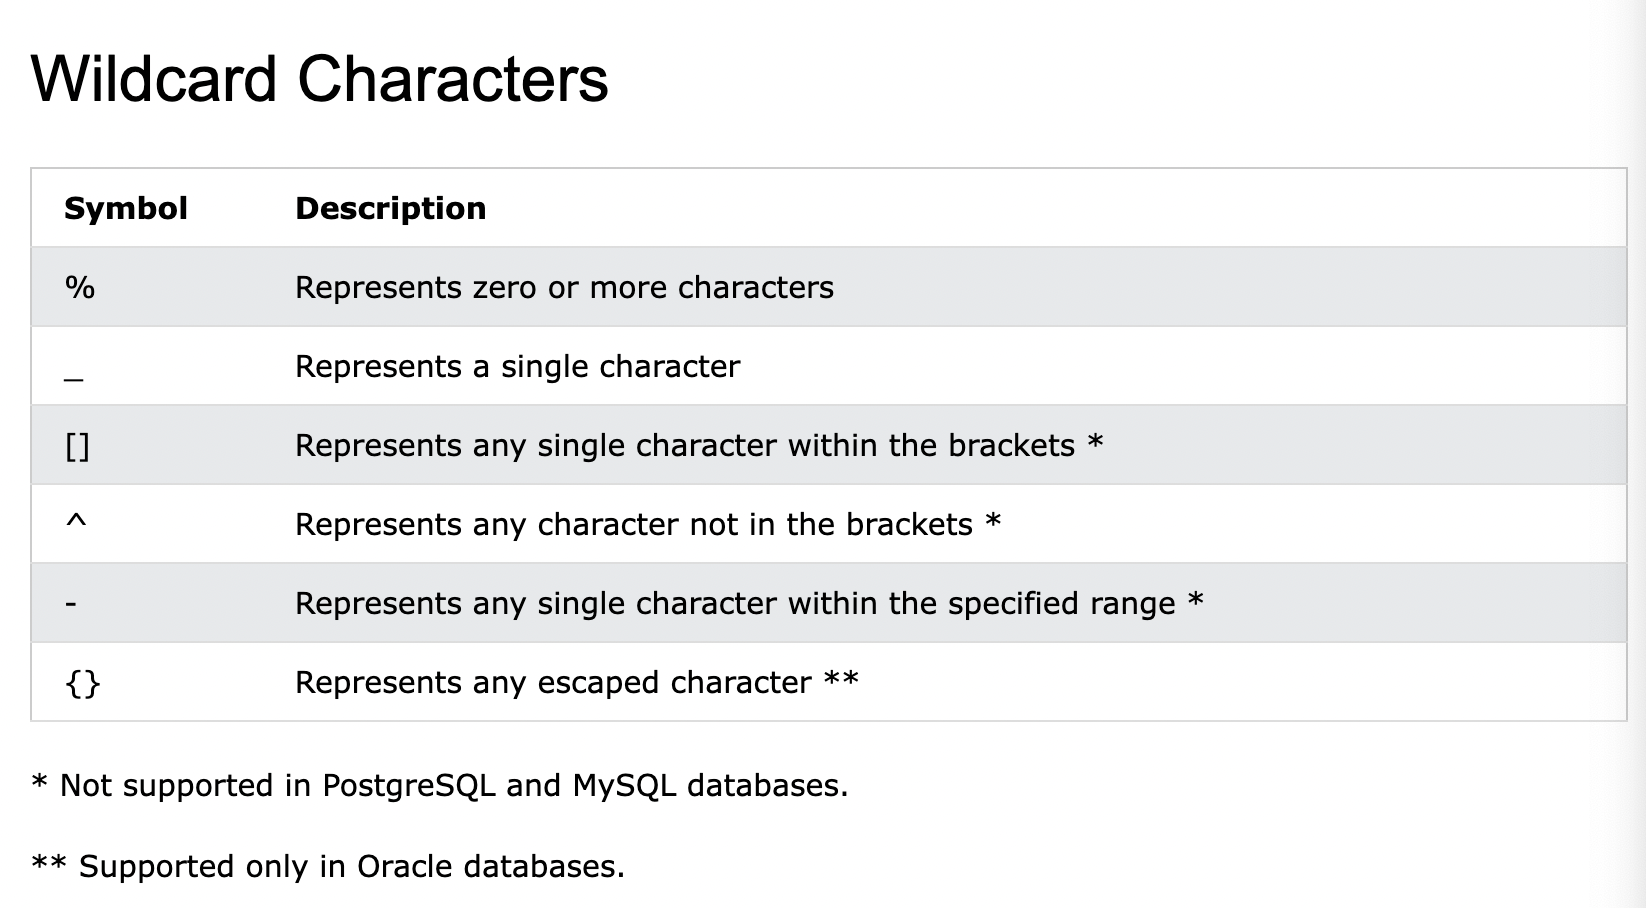

In [84]:
q="""

"""

# Operator

## IN / NOT IN

In [85]:
q="""
SELECT CustomerId, FirstName, Country FROM Customers
WHERE Country IN ('Germany', 'France', 'UK');
"""
exec(q)

,CustomerId,FirstName,Country
0,2,Leonie,Germany
1,36,Hannah,Germany
2,37,Fynn,Germany
3,38,Niklas,Germany
4,39,Camille,France
5,40,Dominique,France
6,41,Marc,France
7,42,Wyatt,France
8,43,Isabelle,France


In [86]:
q="""
SELECT CustomerId, FirstName, Country FROM Customers
WHERE Country NOT IN ('Germany', 'France', 'UK');
"""
exec(q)

,CustomerId,FirstName,Country
0,1,Alie,Brazil
1,3,François,Canada
2,4,Bjørn,Norway
3,5,František,Czech Republic
4,6,Helena,Czech Republic
5,7,Astrid,Austria
6,8,Daan,Belgium
7,9,Kara,Denmark
8,10,Eduardo,Brazil
9,11,Alexandre,Brazil


In [87]:
q="""
SELECT CustomerId, FirstName, Country FROM Customers
WHERE CustomerId IN (SELECT CustomerID FROM Invoices WHERE invoiceId < 20);
"""
exec(q)

,CustomerId,FirstName,Country
0,2,Leonie,Germany
1,4,Bjørn,Norway
2,8,Daan,Belgium
3,14,Mark,Canada
4,16,Frank,USA
5,17,Jack,USA
6,19,Tim,USA
7,21,Kathy,USA
8,23,John,USA
9,25,Victor,USA


In [88]:
q="""
SELECT CustomerId, FirstName, Country FROM Customers
WHERE CustomerId NOT IN (SELECT CustomerID FROM Invoices WHERE invoiceId < 20);
"""
exec(q)

,CustomerId,FirstName,Country
0,1,Alie,Brazil
1,3,François,Canada
2,5,František,Czech Republic
3,6,Helena,Czech Republic
4,7,Astrid,Austria
...,...,...,...
65,85,Michael,None
66,86,Robert,None
67,87,Laura,None
68,90,namu,korea


## BETWEEN

In [89]:
q="""
SELECT * FROM Invoices
WHERE InvoiceDate BETWEEN '2009-01-01' AND '2009-02-01';
"""
exec(q)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
5,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99


In [90]:
# 시간까지 명시하면 begin과 end 값까지 모두 포함
q="""
SELECT * FROM Invoices
WHERE InvoiceDate BETWEEN '2009-01-01' AND '2009-02-01 00:00:00'; 
"""
exec(q)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
5,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
6,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98
7,8,40,2009-02-01 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98


In [91]:
q="""
SELECT * FROM Invoices
WHERE InvoiceDate NOT BETWEEN '2009-01-01' AND '2009-02-01';
"""
exec(q)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98
1,8,40,2009-02-01 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
2,9,42,2009-02-02 00:00:00,"9, Place Louis Barthou",Bordeaux,None,France,33000,3.96
3,10,46,2009-02-03 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,5.94
4,11,52,2009-02-06 00:00:00,202 Hoxton Street,London,None,United Kingdom,N1 5LH,8.91
...,...,...,...,...,...,...,...,...,...
401,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
402,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
403,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
404,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [92]:
q="""
SELECT * FROM Invoices
WHERE InvoiceDate BETWEEN '2009-01-01' AND '2009-02-01'
AND InvoiceId IN (1,2,5);
"""
exec(q)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


In [93]:
# 문자열 비교는 사전순
q="""
SELECT CustomerId, FirstName FROM Customers
WHERE FirstName BETWEEN 'Bcasc' AND 'Deqweqe'
ORDER BY FirstName
"""
exec(q)

,CustomerId,FirstName
0,4,Bjørn
1,39,Camille
2,8,Daan
3,20,Dan


In [94]:
# 문자열 비교는 사전순
q="""
SELECT CustomerId, FirstName FROM Customers
WHERE FirstName NOT BETWEEN 'Bcasc' AND 'Deqweqe'
ORDER BY FirstName
"""
exec(q)

,CustomerId,FirstName
0,32,Aaron
1,11,Alexandre
2,1,Alie
3,60,Andrew
4,68,Andrew
...,...,...
78,42,Wyatt
79,78,namu
80,79,namu
81,90,namu


# Aliases

In [95]:
q="""
SELECT CustomerID AS ID
FROM Customers;
"""
exec(q)

,ID
0,60
1,61
2,62
3,63
4,64
...,...
82,48
83,50
84,51
85,54


## description
이 읽기 전용 어트리뷰트는 마지막 질의의 열 이름을 제공합니다. 파이썬 DB API와의 호환성을 유지하기 위해, 각 열마다 7-튜플을 반환하는데, 각 튜플의 마지막 6개 항목은 None 입니다.

일치하는 행이 없는 SELECT 문에도 설정됩니다.
[Python API docs - sqlite](https://docs.python.org/ko/3.8/library/sqlite3.html)

In [96]:
q="""
SELECT CustomerId ID, FirstName
FROM Customers;
"""
data = cur.execute(q)
print(data.description)
print(data.fetchall())

(('ID', None, None, None, None, None, None), ('FirstName', None, None, None, None, None, None))
[(1, 'Alie'), (2, 'Leonie'), (3, 'François'), (4, 'Bjørn'), (5, 'František'), (6, 'Helena'), (7, 'Astrid'), (8, 'Daan'), (9, 'Kara'), (10, 'Eduardo'), (11, 'Alexandre'), (12, 'Roberto'), (13, 'Fernanda'), (14, 'Mark'), (15, 'Jennifer'), (16, 'Frank'), (17, 'Jack'), (18, 'Michelle'), (19, 'Tim'), (20, 'Dan'), (21, 'Kathy'), (22, 'Heather'), (23, 'John'), (24, 'Frank'), (25, 'Victor'), (26, 'Richard'), (27, 'Patrick'), (28, 'Julia'), (29, 'Robert'), (30, 'Edward'), (31, 'Martha'), (32, 'Aaron'), (33, 'Ellie'), (34, 'João'), (35, 'Madalena'), (36, 'Hannah'), (37, 'Fynn'), (38, 'Niklas'), (39, 'Camille'), (40, 'Dominique'), (41, 'Marc'), (42, 'Wyatt'), (43, 'Isabelle'), (44, 'Terhi'), (45, 'Ladislav'), (46, 'Hugh'), (47, 'Lucas'), (48, 'Johannes'), (49, 'Stanisław'), (50, 'Enrique'), (51, 'Joakim'), (52, 'Emma'), (53, 'Phil'), (54, 'Steve'), (55, 'Mark'), (56, 'Diego'), (57, 'Luis'), (58, 'Manoj

In [97]:
# 공백이 있는 별명을 붙이려면 bracket으로 감싼다 ("" 더블 쿼트도 됨)
q="""
SELECT CustomerId ID, FirstName [Popular Name]
FROM Customers;
"""
data = cur.execute(q)
print(data.description)
print(data.fetchall())

(('ID', None, None, None, None, None, None), ('Popular Name', None, None, None, None, None, None))
[(1, 'Alie'), (2, 'Leonie'), (3, 'François'), (4, 'Bjørn'), (5, 'František'), (6, 'Helena'), (7, 'Astrid'), (8, 'Daan'), (9, 'Kara'), (10, 'Eduardo'), (11, 'Alexandre'), (12, 'Roberto'), (13, 'Fernanda'), (14, 'Mark'), (15, 'Jennifer'), (16, 'Frank'), (17, 'Jack'), (18, 'Michelle'), (19, 'Tim'), (20, 'Dan'), (21, 'Kathy'), (22, 'Heather'), (23, 'John'), (24, 'Frank'), (25, 'Victor'), (26, 'Richard'), (27, 'Patrick'), (28, 'Julia'), (29, 'Robert'), (30, 'Edward'), (31, 'Martha'), (32, 'Aaron'), (33, 'Ellie'), (34, 'João'), (35, 'Madalena'), (36, 'Hannah'), (37, 'Fynn'), (38, 'Niklas'), (39, 'Camille'), (40, 'Dominique'), (41, 'Marc'), (42, 'Wyatt'), (43, 'Isabelle'), (44, 'Terhi'), (45, 'Ladislav'), (46, 'Hugh'), (47, 'Lucas'), (48, 'Johannes'), (49, 'Stanisław'), (50, 'Enrique'), (51, 'Joakim'), (52, 'Emma'), (53, 'Phil'), (54, 'Steve'), (55, 'Mark'), (56, 'Diego'), (57, 'Luis'), (58, 'Ma

In [98]:
q="""
SELECT CustomerId ID, FirstName 'Popular Name'
FROM Customers;
"""
data = cur.execute(q)
print(data.description)
print(data.fetchall())

(('ID', None, None, None, None, None, None), ('Popular Name', None, None, None, None, None, None))
[(1, 'Alie'), (2, 'Leonie'), (3, 'François'), (4, 'Bjørn'), (5, 'František'), (6, 'Helena'), (7, 'Astrid'), (8, 'Daan'), (9, 'Kara'), (10, 'Eduardo'), (11, 'Alexandre'), (12, 'Roberto'), (13, 'Fernanda'), (14, 'Mark'), (15, 'Jennifer'), (16, 'Frank'), (17, 'Jack'), (18, 'Michelle'), (19, 'Tim'), (20, 'Dan'), (21, 'Kathy'), (22, 'Heather'), (23, 'John'), (24, 'Frank'), (25, 'Victor'), (26, 'Richard'), (27, 'Patrick'), (28, 'Julia'), (29, 'Robert'), (30, 'Edward'), (31, 'Martha'), (32, 'Aaron'), (33, 'Ellie'), (34, 'João'), (35, 'Madalena'), (36, 'Hannah'), (37, 'Fynn'), (38, 'Niklas'), (39, 'Camille'), (40, 'Dominique'), (41, 'Marc'), (42, 'Wyatt'), (43, 'Isabelle'), (44, 'Terhi'), (45, 'Ladislav'), (46, 'Hugh'), (47, 'Lucas'), (48, 'Johannes'), (49, 'Stanisław'), (50, 'Enrique'), (51, 'Joakim'), (52, 'Emma'), (53, 'Phil'), (54, 'Steve'), (55, 'Mark'), (56, 'Diego'), (57, 'Luis'), (58, 'Ma

In [99]:
# sqlite에서는 CONCAT(), '+' 대신 '||'를 사용하여 CONCAT을 수행한다.
q="""
SELECT CustomerId ID, FirstName || ", " || LastName || City 'Name City' 
FROM Customers;
"""
## MySQL
# SELECT CustomerName, CONCAT(Address,', ',PostalCode,', ',City,', ',Country) AS Address
# FROM Customers;

data = cur.execute(q)
print(data.description) 
print(data.fetchall())

(('ID', None, None, None, None, None, None), ('Name City', None, None, None, None, None, None))
[(1, 'Alie, GonçalvesJapan'), (2, 'Leonie, KöhlerStuttgart'), (3, 'François, TremblayMontréal'), (4, 'Bjørn, HansenOslo'), (5, 'František, WichterlováPrague'), (6, 'Helena, HolýPrague'), (7, 'Astrid, GruberVienne'), (8, 'Daan, PeetersBrussels'), (9, 'Kara, NielsenCopenhagen'), (10, 'Eduardo, MartinsSão Paulo'), (11, 'Alexandre, RochaSão Paulo'), (12, 'Roberto, AlmeidaRio de Janeiro'), (13, 'Fernanda, RamosBrasília'), (14, 'Mark, PhilipsEdmonton'), (15, 'Jennifer, PetersonVancouver'), (16, 'Frank, HarrisMountain View'), (17, 'Jack, SmithRedmond'), (18, 'Michelle, BrooksNew York'), (19, 'Tim, GoyerCupertino'), (20, 'Dan, MillerMountain View'), (21, 'Kathy, ChaseReno'), (22, 'Heather, LeacockOrlando'), (23, 'John, GordonBoston'), (24, 'Frank, RalstonChicago'), (25, 'Victor, StevensMadison'), (26, 'Richard, CunninghamFort Worth'), (27, 'Patrick, GrayTucson'), (28, 'Julia, BarnettSalt Lake City')

In [100]:
q="""
SELECT * FROM Customers AS Persons WHERE Persons.CustomerId < 5;
"""
data = cur.execute(q)
print(data.description) 
print(data.fetchall())

(('CustomerId', None, None, None, None, None, None), ('FirstName', None, None, None, None, None, None), ('LastName', None, None, None, None, None, None), ('Company', None, None, None, None, None, None), ('Address', None, None, None, None, None, None), ('City', None, None, None, None, None, None), ('State', None, None, None, None, None, None), ('Country', None, None, None, None, None, None), ('PostalCode', None, None, None, None, None, None), ('Phone', None, None, None, None, None, None), ('Fax', None, None, None, None, None, None), ('Email', None, None, None, None, None, None), ('SupportRepId', None, None, None, None, None, None))
[(1, 'Alie', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'Japan', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3), (2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@sur

In [101]:
q="""
SELECT * 
FROM Customers c, Invoices i
WHERE c.CustomerId=i.CustomerId AND c.FirstName LIKE 'A%';
"""
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,...,SupportRepId,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,98,1,2010-03-11 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.98
1,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,121,1,2010-06-13 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96
2,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,143,1,2010-09-15 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,5.94
3,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,195,1,2011-05-06 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,0.99
4,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,316,1,2012-10-27 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,1.98
5,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,327,1,2012-12-07 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,13.86
6,1,Alie,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Japan,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,382,1,2013-08-07 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,8.91
7,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,...,5,78,7,2009-12-08 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,1.98
8,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,...,5,89,7,2010-01-18 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,18.86
9,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,...,5,144,7,2010-09-18 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,8.91


# JOIN

- (INNER) JOIN: matching values in both table
- LEFT (OUTER) JOIN: left table의 모든 레코드에 대해 오른쪽 테이블에 매칭시도
- RIGHT (OUTER) JOIN: right table의 모든 레코드에 대해 left table에 매칭시도
- FULL (OUTER) JOIN: 양쪽모두 매칭시도

> OUTER JOIN의 경우 없는 값은 NULL로 채워짐

In [102]:
q="""
SELECT Orders.OrderID, Customers.CustomerName, Orders.OrderDate
FROM Orders
INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID;
"""
# INNER JOIN은 Matching Value에 한해서만 조인 시도

## 현재 SQLite는 FULL OUTER JOIN과 RIGHT JOIN을 지원하지 않는다.
정확히는 현재 내장된 버전에서는 지원을 하지않고, 최신 버전에서는 FUll JOIN을 지원하기 시작했다고 한다.  
참고.[How to do a FULL OUTER JOIN in SQLite?
](https://stackoverflow.com/questions/1923259/how-to-do-a-full-outer-join-in-sqlite)

In [103]:
q="""
SELECT * 
FROM Customers c
RIGHT OUTER JOIN Invoices i
ON c.CustomerId=i.CustomerId
WHERE c.FirstName LIKE 'Ast%';
"""
exec(q)

RIGHT and FULL OUTER JOINs are not currently supported


## INNER JOIN
(기본) JOIN과 INNER JOIN은 같은 결과를 반환한다. (INNER가 default 전략이기 때문)  
양측 테이블에 매칭되는 레코드간 조인

In [104]:
# 조인문에서는 컬럼명 앞에 테이블명을 명시하는 것이 좋다.
# 조인에 참여하는 테이블 간 이름이 같은 컬럼이 존재하는 경우 어느쪽 컬럼인지 알지못ㅎ나다.
"""
SELECT Products.ProductID, Products.ProductName, Categories.CategoryName
FROM Products
INNER JOIN Categories ON Products.CategoryID = Categories.CategoryID;
"""

# It's Same!
"""
SELECT Products.ProductID, Products.ProductName, Categories.CategoryName
FROM Products
JOIN Categories ON Products.CategoryID = Categories.CategoryID
"""

'\nSELECT Products.ProductID, Products.ProductName, Categories.CategoryName\nFROM Products\nJOIN Categories ON Products.CategoryID = Categories.CategoryID\n'

### 조인에 참여하는 테이블은 비단 두 개 뿐만이 아니라 여러 개가 될 수 있다.

In [105]:
# SELECT Orders.OrderID, Customers.CustomerName, Shippers.ShipperName
# FROM ((Orders
# INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID)
# INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID);

## LEFT / RIGHT / FULL OUTER JOIN
= (LEFT(RIGHT) OUTER JOIN)  
좌측 테이블은 모든 레코드를 반환하고 우측 테이블은 일치하는 경우 조인한 결과를 반환한다.

In [106]:
q="""
SELECT c.FirstName, c.CustomerId, i.InvoiceId, i.InvoiceDate
FROM Customers c
LEFT JOIN Invoices i
ON c.CustomerId=i.CustomerId
WHERE c.FirstName LIKE 'As%';
"""
exec(q)

,FirstName,CustomerId,InvoiceId,InvoiceDate
0,Astrid,7,78,2009-12-08 00:00:00
1,Astrid,7,89,2010-01-18 00:00:00
2,Astrid,7,144,2010-09-18 00:00:00
3,Astrid,7,273,2012-04-24 00:00:00
4,Astrid,7,296,2012-07-27 00:00:00
5,Astrid,7,318,2012-10-29 00:00:00
6,Astrid,7,370,2013-06-19 00:00:00


>현재 버전의 sqlite는 RIGHT JOIN을 지원하지 않으므로 LEFT JOIN으로 바꿔쓰자  
>다음에 따르면 3.39부터는 RIGHT/FULL OUTER JOIN을 지원한다.  
>https://stackoverflow.com/questions/9147025/sqlite3-simulate-right-outer-join-with-left-joins-and-union

In [107]:
q="""
select sqlite_version();
"""
exec(q)

,sqlite_version()
0,3.37.0


## Self JOIN
현재 테이블에 조인하는 경우

In [108]:
# 같은 도시의 고객끼리 ㅜㅁㄲ는다.
q="""
SELECT A.FirstName AS CustomerName1, B.FirstName AS CustomerName2, A.City
FROM Customers A, Customers B
WHERE A.CustomerID <> B.CustomerID
AND A.City = B.City
ORDER BY A.City;
"""
exec(q)

,CustomerName1,CustomerName2,City
0,Hannah,Niklas,Berlin
1,Niklas,Hannah,Berlin
2,Emma,Phil,London
3,Phil,Emma,London
4,Frank,Dan,Mountain View
5,Dan,Frank,Mountain View
6,Camille,Dominique,Paris
7,Dominique,Camille,Paris
8,František,Helena,Prague
9,Helena,František,Prague


# UNION 연산
두 개 이상의 result-set을 하나로 합친다.
- 모든 result-set은 동일한 수의 컬럼을 가져야 한다.
- 모든 컬럼은 비슷한 데이터 타입을 지녀야한다(Integer-Long)
- 컬럼의 순서가 동일해야한다.

```SQL
SELECT column_name(s) FROM table1
UNION
SELECT column_name(s) FROM table2;
```

## UNION ALL 
UNION은 집합 연산에 그 기초를 두고 있는 만큼 기본적으론 DISTINCT된 값만을 반환한다.  
중복값을 허용하기 위해서는 UNION ALL을 사용한다. 
```SQL
SELECT column_name(s) FROM table1
UNION ALL
SELECT column_name(s) FROM table2;
```

In [109]:
q="""
SELECT Address FROM Customers
UNION
SELECT Address FROM Employees
ORDER BY Address;
"""
exec(q)

,Address
0,None
1,1 Infinite Loop
2,1 Microsoft Way
3,1033 N Park Ave
4,"11, Place Bellecour"
...,...
63,Sønder Boulevard 51
64,Tauentzienstraße 8
65,Theodor-Heuss-Straße 34
66,Ullevålsveien 14


In [110]:
q="""
SELECT Address FROM Customers
UNION ALL
SELECT Address FROM Employees
ORDER BY Address;
"""
exec(q)

,Address
0,None
1,None
2,None
3,None
4,None
...,...
90,Sønder Boulevard 51
91,Tauentzienstraße 8
92,Theodor-Heuss-Straße 34
93,Ullevålsveien 14


In [111]:
q="""
SELECT 'Customer' Type, Address FROM Customers
UNION 
SELECT 'Employee', Address FROM Employees
"""
exec(q)

,Type,Address
0,Customer,None
1,Customer,1 Infinite Loop
2,Customer,1 Microsoft Way
3,Customer,1033 N Park Ave
4,Customer,"11, Place Bellecour"
...,...,...
63,Employee,590 Columbia Boulevard West
64,Employee,683 10 Street SW
65,Employee,7727B 41 Ave
66,Employee,825 8 Ave SW


In [112]:
q='SELECT Address FROM Employees'
exec(q)

,Address
0,11120 Jasper Ave NW
1,825 8 Ave SW
2,1111 6 Ave SW
3,683 10 Street SW
4,7727B 41 Ave
5,5827 Bowness Road NW
6,590 Columbia Boulevard West
7,923 7 ST NW


# GROUP BY
그룹으로 묶는다. 집계시에 많이 사용 (카디널리티를 줄이는 방법, 집계함수와 함께 사용ㅎ)

In [113]:
q="""
SELECT COUNT(CustomerId), Country
FROM Customers
GROUP BY Country;
"""
exec(q)

,COUNT(CustomerId),Country
0,24,None
1,1,Argentina
2,1,Australia
3,1,Austria
4,1,Belgium
5,5,Brazil
6,8,Canada
7,1,Chile
8,2,Czech Republic
9,1,Denmark


In [114]:
q="""
SELECT COUNT(CustomerId), Country
FROM Customers
GROUP BY Country
ORDER BY 1 DESC;
"""
exec(q)

,COUNT(CustomerId),Country
0,24,None
1,13,USA
2,8,Canada
3,5,France
4,5,Brazil
5,4,korea
6,4,Germany
7,3,United Kingdom
8,2,Portugal
9,2,India


In [115]:
q="""
SELECT COUNT(*), c.Country
FROM Customers c
LEFT JOIN Invoices i
ON c.CustomerId=i.CustomerId
GROUP BY Country
ORDER BY 1;
"""
exec(q)

,COUNT(*),Country
0,4,korea
1,7,Argentina
2,7,Australia
3,7,Austria
4,7,Belgium
5,7,Chile
6,7,Denmark
7,7,Finland
8,7,Hungary
9,7,Ireland


# HAVING 절
GROUP BY를 통해 묶은 그룹에 대해 WHERE 조건을 명시하기 위한 구문

In [116]:
q="""
SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country
HAVING COUNT(CustomerID) > 5;
"""
exec(q)

,COUNT(CustomerID),Country
0,24,None
1,8,Canada
2,13,USA


In [117]:
q="""
SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country
HAVING COUNT(CustomerID) > 5
ORDER BY COUNT(CustomerID) DESC;
"""
exec(q)

,COUNT(CustomerID),Country
0,24,None
1,13,USA
2,8,Canada


# EXISTS
존재하면 True, 존재하지 않으면 False
```SQL
SELECT column_name(s)
FROM table_name
WHERE EXISTS
(SELECT column_name FROM table_name WHERE condition);
```

In [118]:
q="""
SELECT FirstName || " " || LastName 'FULL NAME'
FROM Customers c
WHERE EXISTS (SELECT InvoiceId FROM Invoices i WHERE c.CustomerId=i.CustomerId);
"""
exec(q)

,FULL NAME
0,Alie Gonçalves
1,Leonie Köhler
2,François Tremblay
3,Bjørn Hansen
4,František Wichterlová
5,Helena Holý
6,Astrid Gruber
7,Daan Peeters
8,Kara Nielsen
9,Eduardo Martins


In [119]:
q="""
SELECT FirstName || " " || LastName 'FULL NAME'
FROM Customers c
WHERE NOT EXISTS (SELECT InvoiceId FROM Invoices i WHERE c.CustomerId=i.CustomerId);
"""
exec(q)

,FULL NAME
0,Andrew Adams
1,Nancy Edwards
2,Jane Peacock
3,Margaret Park
4,Steve Johnson
5,Michael Mitchell
6,Robert King
7,Laura Callahan
8,Andrew Adams
9,Nancy Edwards


In [120]:
q="SELECT COUNT(*) FROM Customers"
exec(q)

,COUNT(*)
0,87


In [121]:
q="""
SELECT COUNT(*)
FROM Customers c
WHERE EXISTS (SELECT InvoiceId FROM Invoices i WHERE c.CustomerId=i.CustomerId);
"""
exec(q)

,COUNT(*)
0,59


# ANY / ALL 
- ANY : 범위 중 하나라도 만족하면 True
    ```SQL
    SELECT column_name(s)
FROM table_name
WHERE column_name operator ANY
  (SELECT column_name
  FROM table_name
  WHERE condition);
    ```
- ALL : 전부 만족해야 True
    ```SQL
    SELECT column_name(s)
FROM table_name
WHERE column_name operator ALL
  (SELECT column_name
  FROM table_name
  WHERE condition);
    ```

> Operator: ( =, <>, !=, >, >=, <, or <= )

In [122]:
# SQLite에는 ANY가 없다. -> IN 써라.
# 다만 Operator를 equal이 아닌 다른 것으로 비교하고 싶다면 이를 적절히 바꿔야한다.
q="""
SELECT FirstName
FROM Customers
WHERE CustomerId = ANY (
    SELECT CustomerId
    FROM Invoices
    WHERE BillingCity='London');
"""
exec(q)

near "SELECT": syntax error


# SELECT ~ INTO 
result set을 통해 새로운 테이블을 생성

In [123]:
# SQLite는 지원하지 않는다.
# q="""
# SELECT * 
# INTO new_customers
# FROM Customers
# WHERE CustomerId > 25;
# """

# 대신 다음과 같이 사용한다
q="""
CREATE TABLE new_customers AS 
SELECT * FROM Customers;
"""
exec(q)


table new_customers already exists


## 기존 SQLite 데이터베이스 파일에서 데이터 선택하여 새로운 데이터베이스 파일에 쓰기
실행 전 커넥션은 새로 쓸 DB에 연결되어 있어야함
```SQL
ATTACH 'path/to/your/sqlite.db' AS source_db;
CREATE TABLE new_customers AS
SELECT CustomerId, FullName
FROM source_db.new_customers;
DETACH source_db;
```

## 레코드를 제외한 스키마만 가져올 수 있다.
```SQL
SELECT * INTO newtable
FROM oldtable
WHERE 1 = 0;
```

# INSERT INTO ~ SELECT
조회한 레코드 삽입 (한 테이블에서 다른 테이블로 데이터 복사)
```SQL
INSERT INTO table2
SELECT * FROM table1
WHERE condition;
```

```SQL
INSERT INTO table2 (column1, column2, column3, ...)
SELECT column1, column2, column3, ...
FROM table1
WHERE condition;
```

In [124]:
q = """
INSERT INTO Customers (FirstName, LastName, email)
SELECT FirstName, LastName, 'dummy@example.com' FROM Employees
"""
exec(q)

0

In [125]:
q = "select * from customers where email='dummy@example.com'"
exec(q)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,60,Andrew,Adams,None,None,None,None,None,None,None,None,dummy@example.com,None
1,61,Nancy,Edwards,None,None,None,None,None,None,None,None,dummy@example.com,None
2,62,Jane,Peacock,None,None,None,None,None,None,None,None,dummy@example.com,None
3,63,Margaret,Park,None,None,None,None,None,None,None,None,dummy@example.com,None
4,64,Steve,Johnson,None,None,None,None,None,None,None,None,dummy@example.com,None
5,65,Michael,Mitchell,None,None,None,None,None,None,None,None,dummy@example.com,None
6,66,Robert,King,None,None,None,None,None,None,None,None,dummy@example.com,None
7,67,Laura,Callahan,None,None,None,None,None,None,None,None,dummy@example.com,None
8,68,Andrew,Adams,None,None,None,None,None,None,None,None,dummy@example.com,None
9,69,Nancy,Edwards,None,None,None,None,None,None,None,None,dummy@example.com,None


# CASE Expression

ELSE가 없으면 NULL값이 됨
```SQL
CASE
    WHEN condition1 THEN result1
    WHEN condition2 THEN result2
    WHEN conditionN THEN resultN
    ELSE result
END;
```

In [126]:
q="""
SELECT CustomerId, Firstname,
CASE 
    WHEN CustomerId > 20 THEN 'Previous Signed User'
    WHEN CustomerId > 10 THEN 'NORMAL USER'
    ELSE 'USER'
END AS USER_TEXT
FROM Customers;
"""
exec(q)

,CustomerId,FirstName,USER_TEXT
0,1,Alie,USER
1,2,Leonie,USER
2,3,François,USER
3,4,Bjørn,USER
4,5,František,USER
...,...,...,...
90,95,Margaret,Previous Signed User
91,96,Steve,Previous Signed User
92,97,Michael,Previous Signed User
93,98,Robert,Previous Signed User


In [127]:
q="""
SELECT City, Country, CustomerId
From Customers
ORDER BY
(CASE
    WHEN City IS NULL THEN Country
    ELSE City
END);
""" # City가 NULL이면 Country 값을 넣어서 비교
exec(q)

,City,Country,CustomerId
0,None,None,60
1,None,None,61
2,None,None,62
3,None,None,63
4,None,None,64
...,...,...,...
90,Yellowknife,Canada,33
91,None,korea,78
92,None,korea,79
93,None,korea,90


# NULL 관련 함수들

## COALESCE()
여러 인자를 받아서 NULL이 아닌 첫번째 인자를 반환

In [128]:
q="""
SELECT FirstName || " " || LastName || " " || IFNULL(Phone, 'NULLLLLLLLLLL') FULLNAME
FROM Customers
WHERE PHONE IS NULL
"""
exec(q)

,FULLNAME
0,Ladislav Kovács NULLLLLLLLLLL
1,Andrew Adams NULLLLLLLLLLL
2,Nancy Edwards NULLLLLLLLLLL
3,Jane Peacock NULLLLLLLLLLL
4,Margaret Park NULLLLLLLLLLL
5,Steve Johnson NULLLLLLLLLLL
6,Michael Mitchell NULLLLLLLLLLL
7,Robert King NULLLLLLLLLLL
8,Laura Callahan NULLLLLLLLLLL
9,Andrew Adams NULLLLLLLLLLL


In [129]:
q="""
SELECT FirstName || " " || LastName || " " || COALESCE(Phone, 'NULLLLLLLLLLL') FULLNAME
FROM Customers
WHERE PHONE IS NULL
"""
exec(q)

,FULLNAME
0,Ladislav Kovács NULLLLLLLLLLL
1,Andrew Adams NULLLLLLLLLLL
2,Nancy Edwards NULLLLLLLLLLL
3,Jane Peacock NULLLLLLLLLLL
4,Margaret Park NULLLLLLLLLLL
5,Steve Johnson NULLLLLLLLLLL
6,Michael Mitchell NULLLLLLLLLLL
7,Robert King NULLLLLLLLLLL
8,Laura Callahan NULLLLLLLLLLL
9,Andrew Adams NULLLLLLLLLLL


## NULLIF()
표현식 1이 표현식 2와 같으면 NULL, 같지않으면 표현식 1을 리턴한다.

NULLIF (표현식1, 표현식2) : 표현식1 과 2과 같으면 NULL, 다르면 표현식 1 리턴

- MGR 7698 이면 NULL로 표시한다. 
```sql
SELECT ENAME, EMPNO, MGR, NULLIF(MGR, 7698) NUIF
FORM   EMP ; 
```

## NVL() / ISNULL()
표현식 1의 결과가 NULL이면 표현식 2의 값 반환

```sql
SELECT ProductName, UnitPrice * (UnitsInStock + NVL(UnitsOnOrder, 0))
FROM Products;
```

# Stored Procedure
SQL을 저장해두고 여러번 재사용  
함수처럼 인자를 받아서 동적으로 조건이 변경되는 쿼리를 호출하기도 함

```sql
CREATE PROCEDURE procedure_name
AS
sql_statement
GO;
```

- 프로시저 호출
```sql
EXEC procedure_name;
```

> sqlite는 Stored Procedure를 지원하지 않음

In [130]:
# 없으니까 그냥 함수로 만들어쓰자
def selectAllCustomersInCity(City):
    query="""
    SELECT * FROM Customers WHERE City=?
    """

    try:
        with sqlite3.connect('chinook.db') as conn:
            cursor = conn.cursor()
            res = cursor.execute(query, (City,))
            cols = [desc[0] for desc in res.description]
            df = pd.DataFrame(res, columns=cols)
            return df
    except sqlite3.Error as e:
        print(e)
    finally:
        conn.close()
        

In [131]:
selectAllCustomersInCity('London')

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,52,Emma,Jones,None,202 Hoxton Street,London,None,United Kingdom,N1 5LH,+44 020 7707 0707,None,emma_jones@hotmail.com,3
1,53,Phil,Hughes,None,113 Lupus St,London,None,United Kingdom,SW1V 3EN,+44 020 7976 5722,None,phil.hughes@gmail.com,3


## Example
```sql
CREATE PROCEDURE SelectAllCustomers @City nvarchar(30), @PostalCode nvarchar(10)
AS
SELECT * FROM Customers WHERE City = @City AND PostalCode = @PostalCode
GO;
```

```sql
EXEC SelectAllCustomers @City = 'London', @PostalCode = 'WA1 1DP';

```

# 주석
```sql
-- 이렇게 하면 주석
/*
여러 줄은
이렇게 주석처리
*/
```